# **Técnicas Avançadas de Captura e Tratamento de Dados**

**Tutor:** Fernando Pereira dos Santos

**MBA em Ciência de Dados**

# **1 - Introdução:**

De forma geral, se a performance obtida com um conjunto de atributos é inadequada, **é natural considerar o aumento da quantidade de atributos**, sendo razoável acreditar que a performance irá melhorar.

Contudo, tem sido frequentemente observado na prática que, **após certo ponto, a inclusão de características adicionais levam a piorar a performance** ao invés de melhorá-la, ou seja, o poder preditivo de um modelo aumenta com o número de atributos, mas depois diminui (Fenômeno Hughes).

**No espaço de características podemos ter:**
- Atributos discriminativos;
- Atributos ruidosos;
- Atributos altamente correlacionados;
- Atributos irrelevantes.

**Analisando o espaço de características:**
- Muitos atributos podem ser correlacionados, o que não contribui para a discriminação das instâncias;
- A simplificação dos dados, sem perder informações importantes, ajuda no processamento, pois reduz o tempo computacional e complexidade do algoritmo;
- Um número elevado de atributos pode levar à maldição da dimensionalidade.

Assim, técnicas de redução de dimensionalidade atuam para reduzir estes impactos e também combater a **maldição da dimensionalidade**:
- Problema causado pelo aumento exponencial no volume associado com a adição de dimensões extras a um espaço matemático;
- Para um tamanho de amostras, existe um número máximo de atributos a partir do qual o desempenho do classificador irá degradar.

**Ideia geral dos Métodos de Redução de Dimensionalidade:**

Métodos de redução de dimensionalidade objetivam encontrar **transformações das covariáveis originais**, que capturam parte considerável das informações presentes, de modo a reduzir redundâncias e a quantidade destas.

Consequentemente, essas técnicas criam uma quantidade reduzida de variáveis:

* $X = \{{X_1, X_2, …, X_d}\}$, sendo o espaço de características original com dimensionalidade $d$

* $Z = \{{Z_1, Z_2, …, Z_m}\}$, sendo o espaço de características resultante com dimensionalidade $m, (m < d)$.



# **2 - Principal Component Analysis (PCA):**

PCA é um técnica de **redução de dimensionalidade não supervisionada** que mapeia o espaço original de atributos em outro espaço, de dimensão inferior, por meio de combinações lineares das covariáveis originais:
* Elimina a redundância e preserva informações importantes;
* Permite selecionar uma quantidade de dimensões (atributos) desejável;
- Mantem grande parte da variância dos dados;
- Proporciona um novo conjunto de atributos em que as variáveis não são correlacionadas e são ortogonais uma às outras.

**Observação:**
- Na teoria, o PCA transforma $d$ variáveis correlacionadas em $d$ variáveis não correlacionadas;
- Ao selecionar $m$ variáveis $(m < d)$, as variáveis com menos variância são descartadas, ocorrendo a redução da dimensionalidade.




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

iris = load_iris()
X = iris.data
Y = iris.target
print("Conjunto de dados IRIS", X.shape)
print("Conjunto de rótulos IRIS", Y.shape)
print("Classes", np.unique(Y))

Conjunto de dados IRIS (150, 4)
Conjunto de rótulos IRIS (150,)
Classes [0 1 2]


<Axes: >

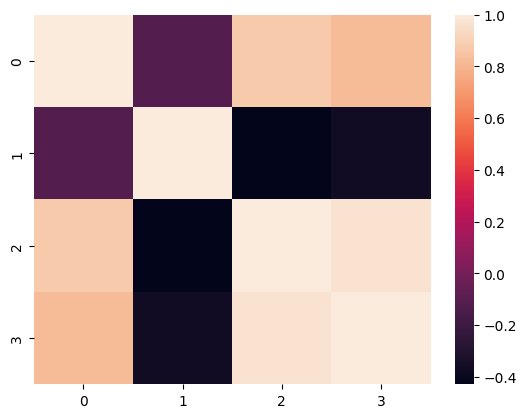

In [2]:
#matriz de correlação das variáveis originais
df = pd.DataFrame(X)
corr = df.iloc[:,:].corr()
sns.heatmap(corr)

In [3]:
# IPCA é uma versão incremental do PCA.
# Na execução do PCA todos os dados são alocados na memória, algo normal para bases de dados pequenas.
# Contudo, quando a quantidade de dados é maior que a capacidade da memória, PCA não pode ser executado.
# Consequentemente, a implementação IPCA permite que se faça as mesmas operações do PCA, carregando fatias dos dados.
# Para isso, o parâmetro batch_size deve ser preenchido, indicando a quantidade de dados carregados por vez.

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

ipca = IncrementalPCA(n_components=2, batch_size=10)
X_ipca = ipca.fit_transform(X)
print(X_ipca.shape)

(150, 2)
(150, 2)


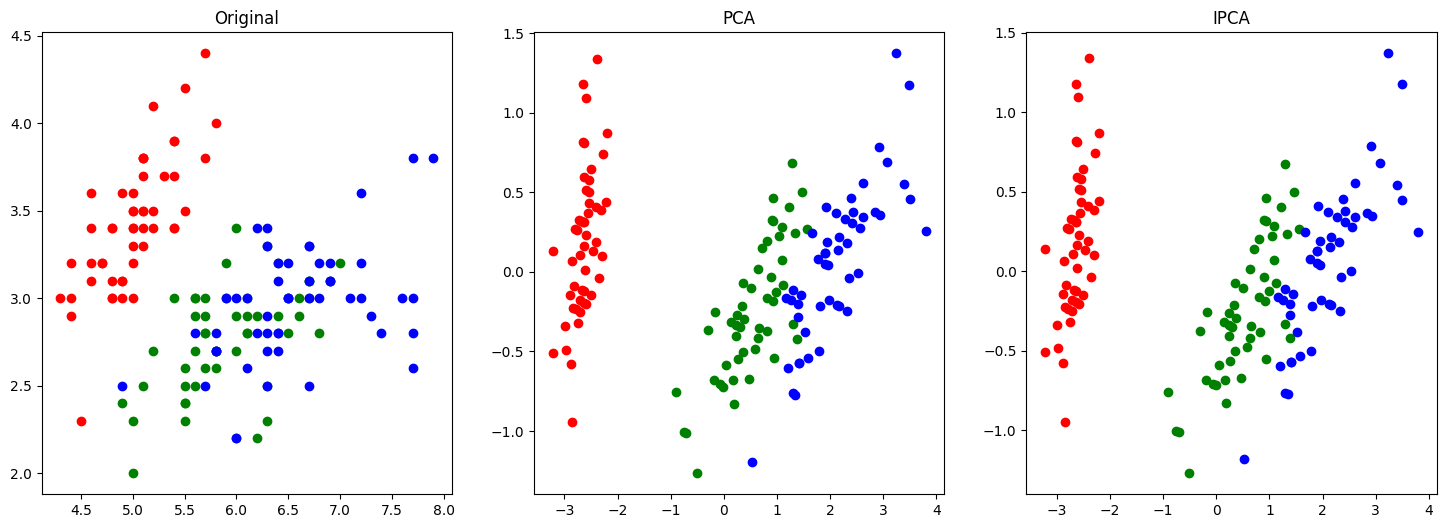

In [4]:
# Comparando a visualização dos espaços de características origianl, PCA e IPCA
plt.figure(figsize=(18, 6))
colors = ['red','green','blue']

plt.subplot(1, 3, 1)
plt.title("Original")
for i in range (0, X.shape[0]):
    plt.scatter(X[i][0], X[i][1], c=colors[Y[i]])

plt.subplot(1, 3, 2)
plt.title("PCA")
for i in range (0, X_pca.shape[0]):
    plt.scatter(X_pca[i][0], X_pca[i][1], c=colors[Y[i]])

plt.subplot(1, 3, 3)
plt.title("IPCA")
for i in range (0, X_ipca.shape[0]):
    plt.scatter(X_ipca[i][0], X_ipca[i][1], c=colors[Y[i]])

plt.show()

**Matematicamente:**

A ideia é encontrar uma nova base para representar os dados de modo que a covariância entre as coordenadas (atributos) seja zero:
- Calcular a matriz de covariância;
- Calcular os autovetores e autovalores da matriz de covariância;
- Ordenar os autovetores de acordo com o valor dos autovalores;
- Obter os componentes: multiplicar os dados originais pelos principais autovetores.

**Matriz de Covariância:** considere duas sequências de valores $\mathbf{x}=\{x_1,x_2,\ldots,x_k\}$ e $\mathbf{y}=\{y_1,y_2,\ldots,y_k\}$.

A covariância entre $\mathbf{x}$ e $\mathbf{y}$ é definida como: $$ cov(\mathbf{x},\mathbf{y}) = \frac{1}{n}\sum_i (x_i-\mu_x)(y_i-\mu_y) $$
onde $\mu_x$ e $\mu_y$ são a média dos valores de $\mathbf{x}$ e $\mathbf{y}$, respectivamente.

Considere $\mathbf{X}=\{\mathbf{x}_1,\ldots,\mathbf{x}_n\} $ um conjunto de pontos em  $\mathbb{R}^d$.

Pode-se organizar os pontos como colunas de uma matriz $\mathbf{X}$ (matriz de dados) com dimensões $d\times n$:

$$
   \mathbf{X}=
    \begin{bmatrix}
      |&|&&|\\
      \mathbf{x}_1&\mathbf{x}_2&\dots&\mathbf{x}_n\\
      |&|&&|
    \end{bmatrix}=
    \begin{bmatrix}
      x_{11}                & {x_{12}} &\dots  & x_{1n}\\
      {x_{21}} & x_{22}               &\dots  & {x_{2n}}\\
      \vdots               &\vdots               &\ddots &\vdots\\
      x_{d1}                & {x_{d2}}&\dots  & x_{dn}
    \end{bmatrix}
$$

Denotando as linhas da matriz $\mathbf{X}$ por ${x}_{1:},\ldots,{x}_{d:}$,
a matriz de covariância de $\mathbf{X}$ é:

$$
cov(\mathbf{X})=
\begin{bmatrix}
      {cov(x_{1:},x_{1:})} & cov(x_{1:},x_{2:})          & \dots  &cov(x_{1:},x_{d:})\\
      cov(x_{2:},x_{1:})          & {cov(x_{2:},x_{2:})} & \dots  &cov(x_{2:},x_{d:})\\
      \vdots                      &      \vdots                 &\ddots  &\vdots\\
      cov(x_{d:},x_{1:})          &cov(x_{d:},x_{2:})           &\dots   &{cov(x_{d:},x_{d:})}
\end{bmatrix}
$$

**Importante**:
- Cada entrada da matrix $cov(\mathbf{X})$ corresponde a correlação entre duas coordenadas do conjunto de pontos  $\mathbf{X}$.
- Os elementos na diagonal da matriz correspondem à variância de cada coordenada.

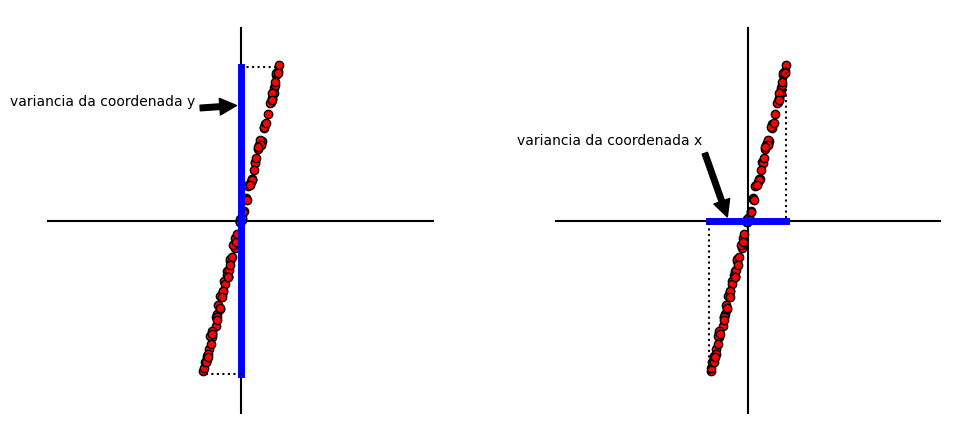

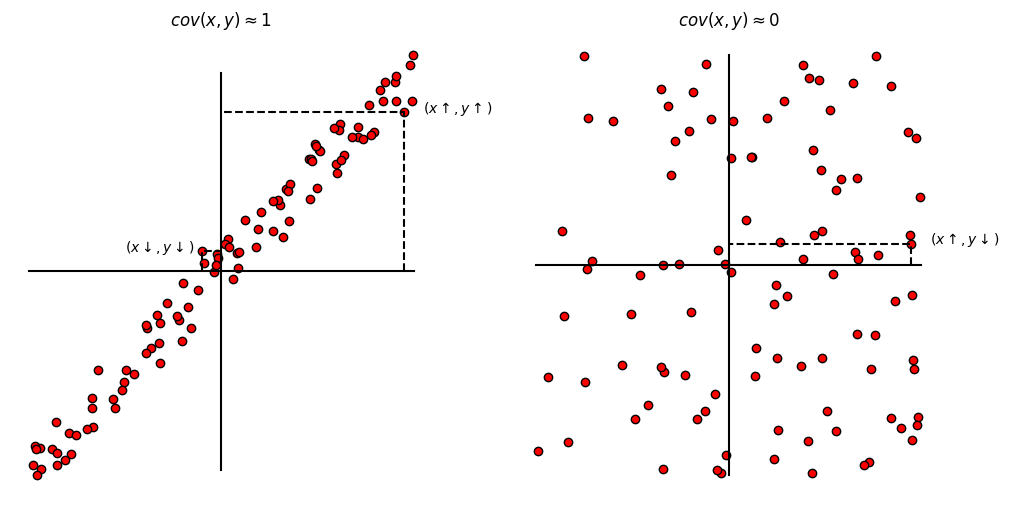

In [5]:
n=100
X = np.zeros((2,n))
X[0,:] = np.random.uniform(-1,1,size=(1,n))
X[1,:] = 4*X[0,:]+np.random.uniform(-0.15,0.15,size=(1,n))

f, (ax1, ax2)  = plt.subplots(1,2,figsize=(12,6))

ax1.set_aspect('equal')
ax1.axis('off')
ax1.scatter(X[0,:],X[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax1.plot([0,0],[-5,5],color='black');
ax1.plot([-5,5],[0,0],color='black');
ax1.plot([0,0],[-4,4],color='blue',linewidth=5);
ax1.plot([0,1],[4,4],':k');
ax1.plot([0,-1],[-4,-4],':k');
ax1.annotate('variancia da coordenada y', xy=(-0.05, 3), xytext=(-6, 3), arrowprops=dict(facecolor='black', shrink=0.05),);

ax2.set_aspect('equal')
ax2.axis('off')
ax2.scatter(X[0,:],X[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax2.plot([0,0],[-5,5],color='black');
ax2.plot([-5,5],[0,0],color='black');
ax2.plot([-1,1],[0,0],color='blue',linewidth=5);
ax2.plot([1,1],[4,0],':k');
ax2.plot([-1,-1],[-4,0],':k');
ax2.annotate('variancia da coordenada x', xy=(-0.5, 0), xytext=(-6, 2), arrowprops=dict(facecolor='black', shrink=0.05),);

f, (ax1, ax2)  = plt.subplots(1,2,figsize=(12,6))

Xc = np.zeros((2,n))
Xc[0,:] = np.random.uniform(-1,1,size=(1,n))
Xc[1,:] = Xc[0,:]+np.random.uniform(-0.15,0.15,size=(1,n))
Xc[0,0] = 0.95
Xc[1,0] = 0.8
Xc[0,1] = -0.1
Xc[1,1] = 0.1

ax1.axis('off')
ax1.scatter(Xc[0,:],Xc[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax1.plot([0,0],[-1,1],color='black');
ax1.plot([-1,1],[0,0],color='black');
ax1.set_title(r'$cov(x,y)\approx 1$');
ax1.text(Xc[0,0]+0.1, Xc[1,0], r'$(x\uparrow,y\uparrow)$');
ax1.plot([Xc[0,0],Xc[0,0],0],[0,Xc[1,0],Xc[1,0]],'--k');
ax1.text(Xc[0,1]-0.4, Xc[1,1], r'$(x\downarrow,y\downarrow)$');
ax1.plot([Xc[0,1],Xc[0,1],0],[0,Xc[1,1],Xc[1,1]],'--k');

Xnc = np.zeros((2,n))
Xnc[0,:] = np.random.uniform(-1,1,size=(1,n))
Xnc[1,:] = np.random.uniform(-1,1,size=(1,n))
Xnc[0,0] = 0.95
Xnc[1,0] = 0.1

ax2.axis('off')
ax2.scatter(Xnc[0,:],Xnc[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax2.plot([0,0],[-1,1],color='black');
ax2.plot([-1,1],[0,0],color='black');
ax2.set_title(r'$cov(x,y)\approx 0$');
ax2.text(Xnc[0,0]+0.1, Xnc[1,0], r'$(x\uparrow,y\downarrow)$');
ax2.plot([Xnc[0,0],Xnc[0,0],0],[0,Xnc[1,0],Xnc[1,0]],'--k');

**Calculando os autovetores e autovalores:**

$$
   \mathbf{A}=
    \begin{bmatrix}
      |&|&|\\
      \mathbf{x}_1&\mathbf{x}_2&\mathbf{x}_3\\
      |&|&|
    \end{bmatrix}
    \begin{bmatrix}
      {\lambda}_1 & 0 & 0 \\
      0 & {\lambda}_2 & 0\\
      0 & 0 & {\lambda}_3\\
    \end{bmatrix}
    {\begin{bmatrix}
      |&|&|\\
      \mathbf{x}_1&\mathbf{x}_2&\mathbf{x}_3\\
      |&|&|
    \end{bmatrix}}^{-1}
$$

**Obtendo os componentes:**

Assumindo que os autovalores estão ordenados $\lambda_1\geq\cdots\geq\lambda_d$, a nova projeção é calculada:

$$
Z = A X
$$

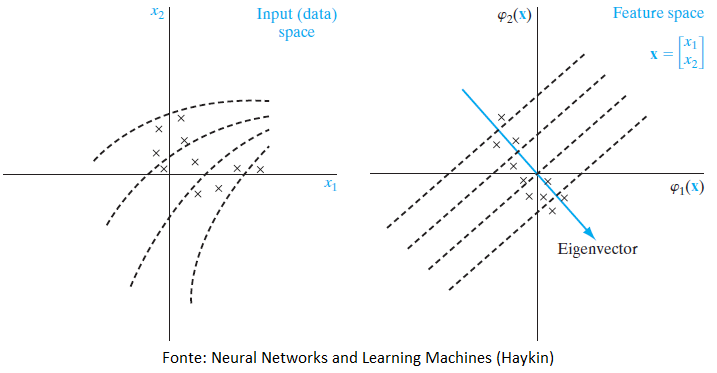

In [6]:
X = np.random.randint(10,50,100).reshape(20,5)

# 1 - Calcular a matriz de covariância:
X_media = X - np.mean(X , axis = 0)
cov_mat = np.cov(X_media , rowvar = False)
print("Matrix de Convariância:")
print(cov_mat)

# 2 - Calcular os autovetores e autovalores da matriz de covariância
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

# 3 - Ordenar os autovetores de acordo com o valor dos autovalores
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

# 4 - Obter os componentes: multiplicar os dados originais pelos principais autovetores
X_reduced = np.dot(sorted_eigenvectors.transpose(), X_media.transpose()).transpose()

# resultado
n_components = 2

print("Dados originais:")
print(X[:, 0:n_components])

print("Dados transformados:")
print(X_reduced[:, 0:n_components])


Matrix de Convariância:
[[143.14473684 -18.90789474   4.42105263  -5.22368421  32.11842105]
 [-18.90789474 151.73421053 -24.02105263 -17.31842105 -96.14473684]
 [  4.42105263 -24.02105263 132.67368421 -25.6         18.73684211]
 [ -5.22368421 -17.31842105 -25.6        132.05        10.27631579]
 [ 32.11842105 -96.14473684  18.73684211  10.27631579 150.51315789]]
Dados originais:
[[18 15]
 [33 23]
 [24 12]
 [36 29]
 [37 49]
 [41 28]
 [28 12]
 [44 30]
 [27 24]
 [43 49]
 [39 19]
 [18 38]
 [48 36]
 [27 19]
 [16 48]
 [47 22]
 [11 37]
 [30 32]
 [18 45]
 [10 44]]
Dados transformados:
[[ 22.9539287   -1.41341929]
 [ 11.07326747 -15.09398513]
 [ 20.85410662  15.23840483]
 [  0.10802772   7.43609178]
 [-19.29801852  30.06316714]
 [  7.15425117   5.24965531]
 [  8.76494644 -16.49639089]
 [ 16.28848914  -5.51011495]
 [ -5.45394074  -3.06929398]
 [-22.52449854  -4.168886  ]
 [ 11.5455507   -1.6497877 ]
 [-20.14473076  -0.74792256]
 [  4.76307831  19.66391437]
 [ 15.85977718  10.89027199]
 [-25.8342

**Resumindo:**
* O primeiro componente principal ${Z}_1 = \lambda_{1} X_1 + … + \lambda_{d} X_d$ é a combinação linear de todas as variáveis de $X$ com a maior variância possível;
* De forma similar, $Z_2$ segue a mesma definição, porém, deve ter correlação zero com $Z_1$.
* O usuário determina quantas componentes irá utilizar.

# **3 - Observações importantes:**

**Como determinar quantas componentes utilizar?**

**Método do cotovelo (variância acumulada):** indica a quantidade de variáveis necessárias para explicar a variância dos dados projetados.

In [8]:
pca = PCA().fit(X)
print(pca.explained_variance_ratio_)

ipca = IncrementalPCA().fit(X)
print(ipca.explained_variance_ratio_)

[0.37511612 0.22283246 0.19077798 0.13620204 0.0750714 ]
[0.37511612 0.22283246 0.19077798 0.13620204 0.0750714 ]


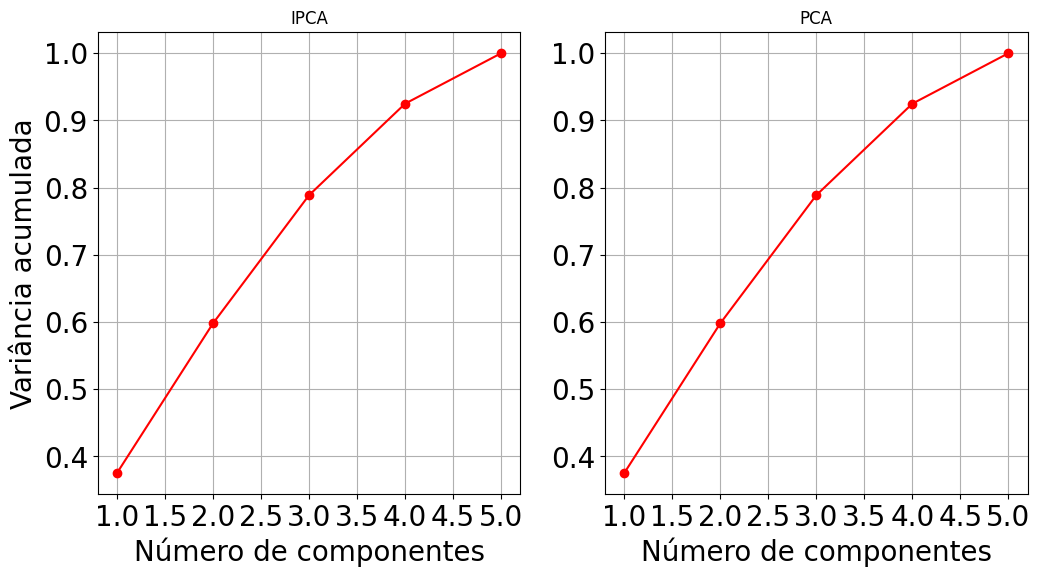

In [19]:
plt.figure(figsize=(12,6))

ncomp = np.arange(1, np.shape(X)[1]+1)

# mostra a variância acumulada
plt.subplot(1, 2, 1)
plt.title("IPCA")
plt.plot(ncomp, np.cumsum(ipca.explained_variance_ratio_), 'ro-')
plt.xlabel('Número de componentes', fontsize=20)
plt.ylabel('Variância acumulada', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)

# mostra a variância acumulada
plt.subplot(1, 2, 2)
plt.title("PCA")
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Número de componentes', fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)

plt.show()

**Definir um valor de variância desejado:**

In [20]:
# valor entre 0 e 1
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(20, 5)


**Dados não estruturados:**
- O tamanho do conjunto de dados pode aumentar rapidamente quando trabalhamos com dados não estruturados, como imagens e vídeos, ou com redes neurais (a rede neural irá disponibilizar os atributos que podem ser da ordem de milhares para cada exemplo). Consequentemente, **dependendo da quantidade de atributos, a alocação completa na memória é inviável.** Ainda, **muitos atributos são redundantes e não possuem variância**. Então, aplicar técnicas de redução de dimensionalidade pode ser uma boa alternativa para melhorar o espaço de características e reduzir o custo computacional do classificador.
- Um detalhe a ser observado é em **cenários com treinamento e teste disjuntos**. Assim, ao aplicar PCA, por exemplo, no conjunto de treinamento estamos transformando o espaço referente a este conjunto. Consequentemente, se aplicarmos PCA novamente ao conjunto de teste podemos ter outro espaço completamente diferente. Assim, uma abordagem  mais confiável é:


    pca = PCA(n_components=n_components)
    X_pcaTrain = pca.fit_transform(X_train)
    X_pcaTest = pca.transform(X_test)

- Aqui, estamos utilizando a combinação linear encontrada no conjunto de treinamento e aplicando-a ao conjunto de teste. Portanto, o conjunto de teste é transformado seguindo as diretrizes definidas pelo conjunto de treinamento.
- Outro método muito utilizado para reduzir a dimensionalidade são **AutoEncoders**. AutoEncoders são redes neurais profundas não supervisionadas, utilizadas para aprender uma representação dos dados de entrada.


# **Considerações finais:**

- Métodos de redução de dimensionalidade objetivam encontrar transformações das covariáveis originais de modo a reduzir redundâncias e a quantidade destas.
- **Principal Component Analysis (PCA)** reduz a quantidade de representações descartando as combinações lineares que possuem pequenas variâncias, retendo as que possuem alta variabilidade.
- Um modo de determinar a quantidade de componentes a serem utilizadas é o **Método do Cotovelo, em que se verifica o gráfico da variância acumulada**. Quando o ganho de variância se torna pequeno, as componentes posteriores podem ser descartadas.
- As **variáveis independentes podem ser explicativas, binárias ou contínuas**. Entretanto, a mistura destes tipos para descrever uma instância pode enviesar a estimação da função discriminante.
- Como somente um centróide é utilizado por classe, a tendência é que **a performance caia quando os dados de uma mesma classe se encontram espalhados no conjunto original**. Assim, ao aplicar o LDA em casos com poucos exemplos têm-se a instabilidade da matriz intra-classes.

# **Bibliografia básica:**
* Duda, Hart, Stork, Pattern Classification, Wiley, 2nd. Edition, 2001 (Capítulos 3, 4, 5 e 10).
* Hastie, Tibshirani, Friedman. The Elements of Statistical Learning: Data Mining, Inference, and Prediction, Springer, 2002 (Capítulos 4, 12 e 15).

# **Leituras complementares:**
* Haykin. Neural Networks and Learning Machines, 2nd. Edition, Bookman, 2001 (Capítulo 8).
* Kuncheva, Combining Pattern Classifiers:
Methods and Algorithms, Wiley-Interscience, 2004 (Capítulo 2).
* Bishop. Pattern Recognition and Machine Learning (Capítulo 4).
* Van der Maaten, Postma, Van den Herik. **Dimensionality Reduction: A Comparative Review**, 2009.
* Sorzano, Vargas, Pascual‐Montano. **A survey of dimensionality reduction techniques**, 2014.
* Ayesha, Hanif, Talib. **Overview and comparative study of dimensionality reduction techniques for high dimensional data**, 2020.
* Wen, Jie and Fang, Xiaozhao and Cui, Jinrong and Fei, Lunke and Yan, Ke and Chen, Yan and Xu, Yong. **Robust sparse linear discriminant analysis**, 2018.